___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [1]:
from platform import python_version
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

%matplotlib inline

In [2]:
print("version:")
print("python: ", python_version())
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", sns.__version__)
print("sklearn: ", sklearn.__version__)
print("pydot: ",pydot.__version__)

version:
python:  3.7.1
numpy:  1.15.4
pandas:  0.23.4
seaborn:  0.9.0
matplotlib:  0.9.0
sklearn:  0.20.2
pydot:  1.3.0


## Get the Data

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
# patiets who have kyphosis and then have operation (spinal surgery)
# the data represent whether or not the kyphosis was present after
# the operation
# age = age of the person in month (its data on children)
# number = number of vertebrae involved in the operation 
# start = nuumber of the first or topmost vertebrae was operated on
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()
# small data set, only 81 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


## EDA

We'll just check out a simple pairplot for this small dataset.

/home/jun-chieh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


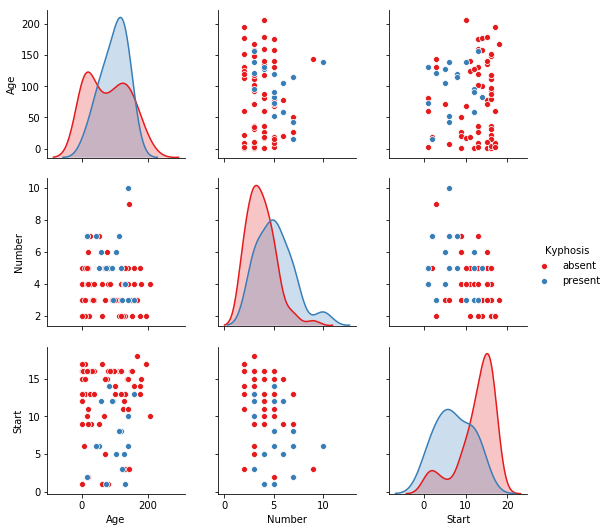

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [7]:
#from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [10]:
#from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [13]:
predictions = dtree.predict(X_test)

In [14]:
#from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.95      0.75      0.84        24
     present       0.00      0.00      0.00         1

   micro avg       0.72      0.72      0.72        25
   macro avg       0.47      0.38      0.42        25
weighted avg       0.91      0.72      0.80        25



In [16]:
print(confusion_matrix(y_test,predictions))

[[18  6]
 [ 1  0]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library (pip install pydot), but here is an example of what it looks like and the code to execute this:

In [17]:
#
# I use conda to install pydot, and both pydot and graphviz are 
# installed.
# ref:
# https://www.graphviz.org/
# 

#conda install pydot
#Solving environment: done

## Package Plan ##

#  environment location: /home/jun-chieh/anaconda3

#  added / updated specs: 
#    - pydot


#The following packages will be downloaded:

#    package                    |            build
#    ---------------------------|-----------------
#    graphviz-2.40.1            |       h21bd128_2         6.9 MB
#    pydot-1.3.0                |           py37_1          40 KB
#    ------------------------------------------------------------
#                                           Total:         7.0 MB

#The following NEW packages will be INSTALLED:

#    graphviz: 2.40.1-h21bd128_2
#    pydot:    1.3.0-py37_1     

#Proceed ([y]/n)? y


#Downloading and Extracting Packages
#graphviz-2.40.1      | 6.9 MB    | ############################################################################################################################################################ | 100% 
#pydot-1.3.0          | 40 KB     | ############################################################################################################################################################ | 100% 
#Preparing transaction: done
#Verifying transaction: done
#Executing transaction: done


In [18]:
#from IPython.display import Image  
#from sklearn.externals.six import StringIO  
#from sklearn.tree import export_graphviz
#import pydot 
#print(pydot.__version__)

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

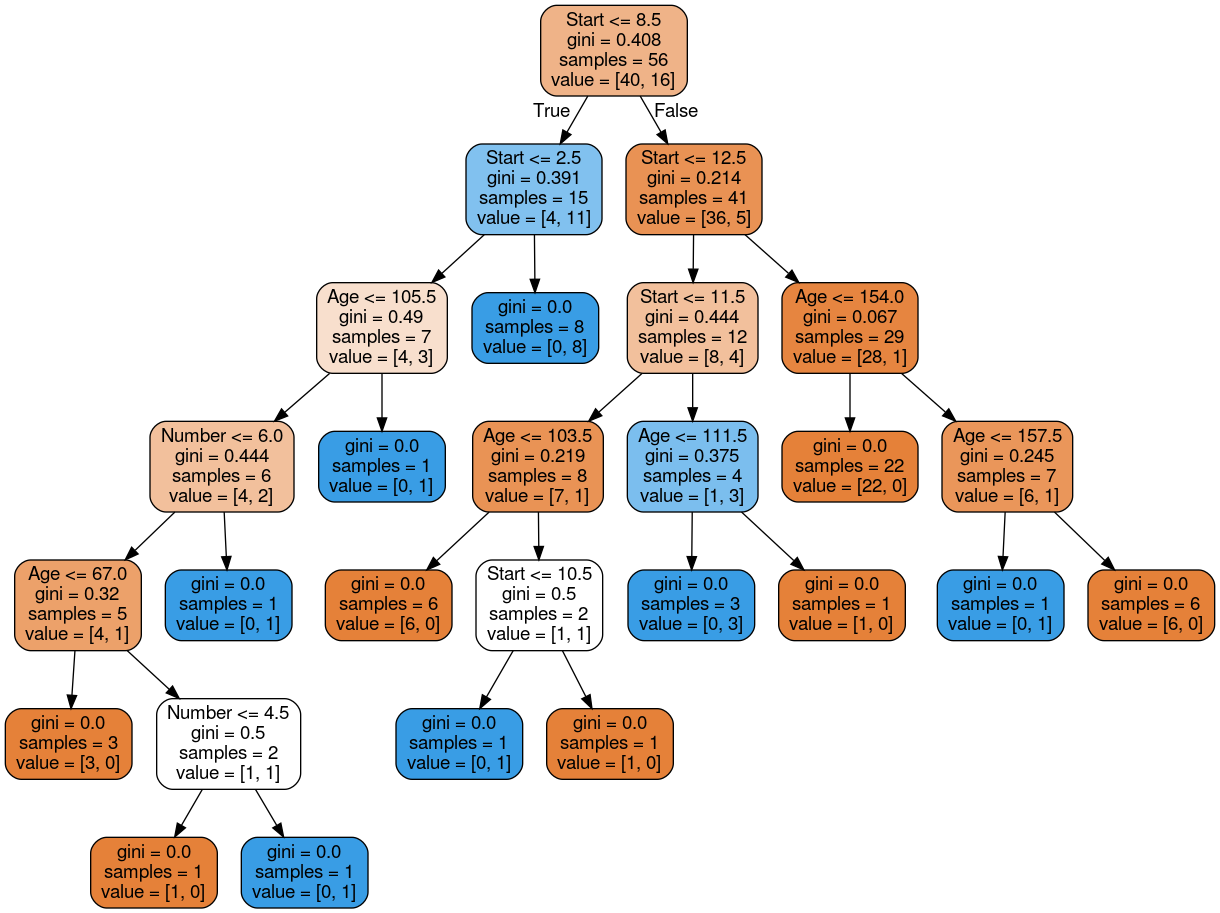

In [19]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  
# Image(graph[0].create_png())   will not run unless you have graphviz library

## Random Forests

Now let's compare the decision tree model to a random forest.

In [20]:
#from sklearn.ensemble import RandomForestClassifier
# its from sklearn.ensemble, not from sklearn.tree
#
rfc = RandomForestClassifier(n_estimators=200)
# n_estimators : The number of trees in the forest.
#
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,rfc_pred))

[[20  4]
 [ 1  0]]


In [23]:
print(classification_report(y_test,rfc_pred))

#
# when data set gets larger, random forest will always be 
# better than decision tree
#

              precision    recall  f1-score   support

      absent       0.95      0.83      0.89        24
     present       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80        25
   macro avg       0.48      0.42      0.44        25
weighted avg       0.91      0.80      0.85        25



In [24]:
df['Kyphosis'].value_counts()
# we have more instance of absent than present, 
# our label and data is unbalanced, that can also affect the model,
# so keep it in mind when you compare decision tree with 
# random forest 

absent     64
present    17
Name: Kyphosis, dtype: int64

# Great Job!